# Assignment A2 [50 marks]

This is the second assignment for MATH08065 Computing and Numerics.

### Academic misconduct

Note that this is an **individual assignment**. Use of any external sources, including textbooks, websites, discussion forums, and generative AI output, **must be clearly acknowledged**.

- [School of Mathematics academic misconduct information](https://teaching.maths.ed.ac.uk/main/undergraduate/studies/assessment/academic-misconduct)

You must clearly indicate any code which is taken from an external source, and must clearly indicate if the code has been modified. For example

```
### Modified version of code from [author] [url] [access date]
...
### End of acknowledged code
```

Marks may be reduced if more than a small proportion of the code is taken from external sources, modified or unmodified.

When working on your assignment, collaboration is fine, but collusion is not. Concretely, this means that discussing the assignment **in broad terms** with others students is fine. However, you are **not permitted to share your working** (even partially) with other students -- that includes your code, any detailed description or explanation of code, and any results or analysis you perform. Submissions may be checked for similarity.

### Automarking

Questions 1.1, 2.1, and 2.2 will use gradescope automarking. It is important that

- Your submission consists of a single notebook, with file extension `.ipynb`.
- The indicated functions are only defined once each in your notebook.
- Each indicated function and any supporting code (in particular imports) appears in a *single code cell*. Only code in this cell will be used for testing your function. e.g. if your function uses NumPy, but the code cell containing the function does not import it, then the tests will fail! As exception, your `gamma_n` function will be available to your `gamma_n_inverse` function in 2.2.
- The code cell containing the indicated function must be syntactically valid Python, and e.g. must not use 'magic commands' (such as commands starting `%matplotlib`).
- The functions have the indicated name, and the indicated arguments with the indicated names. No additional arguments, or default argument values, should be used.

You may use NumPy, SciPy, and matplotlib for your assignment. Other libraries may not be available in the autograder.

For the complete mark scheme see `mark_scheme.pdf`.

### Submission

To submit your assignment to Gradescope:

1. Make sure you run all the cells in your `A2.ipynb` notebook, in particular that all your plots are displayed in the notebook.
2. Make sure you've pushed all your work to GitHub. (Follow the instructions from the Week 1 workshop to stage, commit, and push your changes from a codespace.)
3. If you haven't already done this for A1, go to Gradescope, and link your GitHub account by following these instructions (you'll only need to do this once): [https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts](https://guides.gradescope.com/hc/en-us/articles/21587275611533-Linking-and-Unlinking-Accounts)
4. Select the assignment "A2" on Gradescope, and click "Submit".
5. Select your `A2` repository.
6. Then, select the `main` branch. (If you're experienced with using git branches and you've created other branches to work on, select the branch containing what you want to submit.)

Further submission instructions are available through Gradescope support: [https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment](https://guides.gradescope.com/hc/en-us/articles/21865616724749-Submitting-a-Code-assignment)

## Question 1: Numerical differentiation

**1.1** We consider a finite difference approximation for a first derivative of the form

$$F'(x) \approx \frac{1}{h} \sum_{i = 0}^{N - 1} \alpha_i F ( x_0 + h \beta_i ).$$

Write a function `finite_difference` which takes the following arguments.

  - A `callable` defining $F$. This function may be assumed to accept a single floating point input argument defining, say, $x$, and may be assumed to return a floating point value corresponding to $F(x)$.
  - A `float` defining $x_0$.
  - A `float` defining $h$.
  - A shape `(N,)` NumPy array with floating point data type defining $\alpha$, where the $i$th element counting from zero corresponds to $\alpha_i$.
  - A shape `(N,)` NumPy array with floating point data type defining $\beta$, where the $i$th element counting from zero corresponds to $\beta_i$.

The function `finite_difference` should return the finite difference approximation for the first derivative at $x_0$ defined using the formula above, as a `float`.

After your function definition add code which checks your function behaves correctly for some simple cases. Your verification code should be clear, easy to understand, commented as necessary, and should display a small amount of relevant output.

The function must have the form

```
def finite_difference(F, x_0, h, alpha, beta):
    ...
    return derivative_approximation
```

**[5 marks]**

In [2]:
import numpy as np
import matplotlib.pyplot as plt

#Function
def finite_difference(F, x_0, h, alpha, beta):
    
    return np.sum(alpha * F(x_0 + h * beta)) / h 
    #Calculates alpha*F(x_0+h*beta))/h for each corresponding value in alpha and beta, and then adds them.


#Verification.
def f(x):
    return np.sin(x)


x_0 = np.pi/2
h = 0.01

alpha = np.array([-1,1])
beta = np.array([0,1])

print(f'Approximated value : {finite_difference(f,x_0,h,alpha,beta)}')
print(f'Actual value: 0') #Since f'(x) = cos(x) and cos(pi/2) = 0.

Approximated value : -0.004999958333473664
Actual value: 0


**1.2** Consider $N = 3$, let

$$\beta = \left( \begin{array}{c} -2 \\ -1 \\ 0 \end{array} \right),$$

and let $\alpha$ be defined by

$$\alpha = \left( \begin{array}{ccc} 0 & 0 & 1 \end{array} \right) M^{-1} A$$

where $M$ and $A$ are $3 \times 3$ matrices defined by

$$M = \frac{1}{15} \left( \begin{array}{ccc} 4 & 2 & -1 \\ 2 & 16 & 2 \\ -1 & 2 & 4 \end{array} \right),$$
$$A = \frac{1}{6} \left( \begin{array}{ccc} -3 & 4 & -1 \\ -4 & 0 & 4 \\ 1 & -4 & 3 \end{array} \right).$$

Investigate the accuracy of the finite difference approximation. Summarize your results in a discussion of no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[7 marks]**

The mimimum error for f(x) is at h = 1.519911082952933e-06
The mimimum error for g(x) is at h = 2.848035868435805e-06
The average step size for minimum error is 2.183973475694369e-06


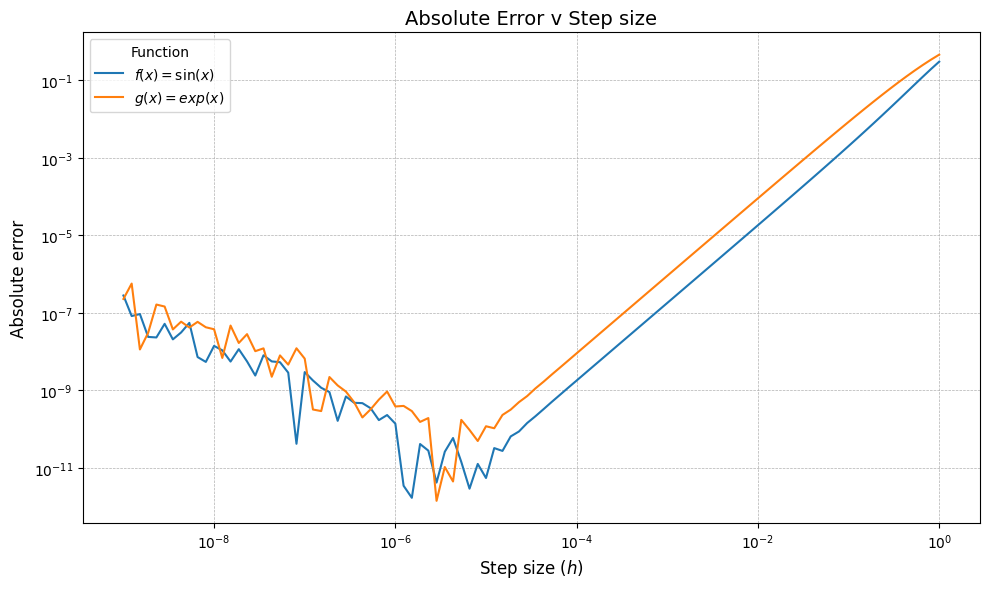

In [10]:
import numpy as np
import matplotlib.pyplot as plt

#Inputting given parameters.
M = 1/15 * np.array([
    [4, 2, -1],
    [2, 16, 2],
    [-1, 2, 4]])

A = 1/6 * np.array([
    [-3, 4, -1],
    [-4, 0, 4],
    [1, -4, 3]])

alpha = np.array([0, 0, 1]) @ np.linalg.inv(M) @ A
beta = np.array([-2, -1, 0])

#Defining functions.
def f(x):
    return np.sin(x)

def f_dash(x):
    return np.cos(x)

def g(x):
    return np.exp(x)

def g_dash(x):
    return np.exp(x)

#Preparing function parameters and empty lists.

x_0 = 1

h_list = np.logspace(-9, 0, 100)


f_errors = []

g_errors = []

min_errors = []

#Calculate error for each value of h and add it to the correspnding error list.
for h in h_list:
    f_errors.append(abs(f_dash(x_0)- finite_difference(f,x_0,h,alpha,beta)))
    g_errors.append(abs(g_dash(x_0)- finite_difference(g,x_0,h,alpha,beta)))
    
for i in range(len(h_list)):
    if f_errors[i] == min(f_errors):
        print(f'The mimimum error for f(x) is at h = {h_list[i]}')
        min_errors.append(h_list[i])

    if g_errors[i] == min(g_errors):
        print(f'The mimimum error for g(x) is at h = {h_list[i]}')
        min_errors.append(h_list[i])


print(f'The average step size for minimum error is {sum(min_errors)/2}')
#Graph error list with h values.
plt.figure(figsize=(10, 6))
plt.loglog(h_list, f_errors, label=r"$f(x) = \sin(x)$")
plt.loglog(h_list, g_errors, label=r"$g(x) = exp(x)$")
plt.xlabel("Step size ($h$)", fontsize=12)
plt.ylabel("Absolute error", fontsize=12)
plt.title("Absolute Error v Step size", fontsize=14)
plt.legend(title="Function")
plt.grid(True, which='both', ls='--', lw=0.5)
plt.tight_layout()
plt.show()




## Discussion

In question 1, I was tasked with investigating the accuracy of a finite difference approximation for the first derivative of the form $$F'(x) = \frac{1}{h} \sum_{i=0}^{N-1} \alpha_i F(x_0 + h \beta_i)$$ for given values of $\alpha$ and $\beta$. 

In this approximation, 
* F - Some function
* h - Step Size
* $x_0$ - A point where the derivative is to be approximated
* $\alpha$ - Weights for the approximation
* $\beta$ - Shift values

Note: The values for beta we are given cause our approximation to be a backward-bias scheme (uses values either before or at $x_0$), since $\beta_i \leq 0$.

I chose to investigate the approximations accuracy by first picking some functions on which to test the approximation, $f(x) = \sin(x)$ and $g(x) = \exp(x)$. I chose these functions because I knew their derivatives, which made it easier to calculate the error in the approximation. 

Next, I created a list of h values ranging from $1 * 10^{-9}$ to $1$, log spaced apart and containing $100$ steps. These values of h were each used in the finite_difference function, with either $f(x)$ or $g(x)$, and a point $x_0$, where the derivative is compared to the approximation. This is then subtracted from the actual value for the derivative and is absoluted, giving us the absolute error. 

I then graphed the absolute values against their h values to see the trend they created. In the graph, the value of the error is significant at h = 1, because our approximation is more inaccurate for large step size ($h$). As h decreases, so does our error, but at about h = $1*10^{-5}$, the consistency of the decrease in the absolute error is lost. This should not be the case meaning it must be due to rounding errors caused by how computers handle calculations with small decimal values.

For both functions, I also calculated at what value of h the absolute error is minimised. After these points, the error begins to rise due to the increasing amount of decimal places involved in the calculation and in turn, the increase in rounding errors. The average step size for minimum error is simply the average of these two calculated values, and is an estimator which becomes more accurate as more functions are inputted. It gives a good idea of at which h value our approximation is most accurate.

In conclusion, small step size may imply a more accurate approximation usually, but when using computers for calculations, the effects of rounding errors must be considered. To get an accurate approximation, using a step size that is too big or small will result in error. 

## Question 2: Function inverse

For each non-negative integer $n$ we define a function $\gamma_n : \mathbb{R} \rightarrow \mathbb{R}$ where

$$\gamma_n ( x ) = \begin{cases} \frac{1}{(n + 1)!} & \text{if} ~ x = 0 \\
                                 \frac{e^x - \sum_{k = 0}^n \frac{1}{k!} x^k}{x^{n + 1}} & \text{otherwise} \end{cases}.$$

**2.1** Write a function named `gamma_n` which takes as input two arguments named `n` and `x`, defining $n$ and $x$ respectively, where $x \ge 0$, and which returns the result of $\gamma_n ( x )$. You may assume that `n` is an `int` and that `x` is a non-negative `float`.

The function must have the form

```
def gamma_n(n, x):
    ...
    return y
```

Autograder tests will consider up to $n = 6$.

**[4 marks]**

In [57]:
import math

def gamma_n(n, x):
    sum = 0
    # Add code here
    if x == 0:
        y = 1/math.factorial((n+1))
        
    else:
        for k in range(n+1):
            sum = sum + x**k/math.factorial(k)
        
        y = (np.exp(x) - sum)/x**(n+1)
        
    
    return y

**2.2** Write a function named `gamma_n_inverse` which takes as input two arguments named `n` and `y`, defining $n$ and $y$ respectively, where $y \ge \gamma_n (0)$, and which returns a value $x$ such that $\gamma_n ( x ) = y$. You may assume that `n` is an `int` and that `y` is a `float`.

In a discussion of not more than $400$ words explain and justify any decisions made in your code.

The function must have the form

```
def gamma_n_inverse(n, y):
    ...
    return x
```

Autograder tests will consider up to $n = 6$.

Your `gamma_n` function defined above will be available to your `gamma_n_inverse` function defined here, when run in the autograder. However you should define all other necessary objects, and in particular import any required modules, in the code cell in which `gamma_n_inverse` is defined.

**[8 marks]**

In [ ]:
import numpy as np

def bisection_method(F, a, b, *, tol=1e-10):
    
    c = F(a)
    
    while abs(F(c)) >= tol:
        if F(a) * F(b) > 0:
            raise ValueError("Invalid (a, b): no sign change.")
        
        c = (a + b) / 2

        if F(a) * F(c) <= 0:
            b = c
            
        else:
            a = c
    return c

def gamma_n_inverse(n, y):
    
    def f(x):
        return gamma_n(n,x) - y

    a = 0
    b = 1
    while f(b) <= 0:
        b *= 2
    
    x = bisection_method(f,a,b,tol=1e-10)
    
    return x
    

11.097524964120737

In [62]:
def verify(a,b,num_iter):
    n_vals = list(range(0,7))
    x_vals = np.linspace(a,b,num_iter)

    for n in n_vals:
        for x in x_vals:
            if abs(gamma_n_inverse(n, gamma_n(n, x)) - x) > 0.00005:
                print(f'Error for n = {n} and x = {x}')

verify(1,100,200)

In Question 2, I was tasked with creating a function "*gamma_n*" which has inputs $n$ and $x$, and output $y$ and a function "*gamma_n_inverse*", which has inputs $n$ and $y$, and output $x$.

To create the inverse, I first chose to investigate the $\gamma_n ( x )$ function, and after noticing that it would be too difficult to find algebraically, I knew I would need to use a numerical method to solve the equation $\gamma_n ( x ) = y$ for $x$. Firstly I noticed that $\gamma_n ( x )$ is strictly increasing and to check if it was continuous, I evaluated $\lim_{x \to 0} \gamma_n ( x )$. To do this I noticed that, $$\gamma_n ( x ) = \frac{R_{n+1}(x)}{x^{n+1}},$$ where $R_{n+1}(x)$ is the remainder term of the Taylor expansion of $e^x$ at order $n$. 

It's known that $$R_{n+1}(x) = \frac{e^c x^{n+1}}{(n+1)!}, \quad c \in (0, x),$$ so, $$\gamma_n ( x ) = \frac{e^c x^{n+1}}{(n+1)!x^{n+1}} = \frac{e^c}{(n+1)!},$$ and as $x \to 0$, $c \to 0$, so $$\lim_{x \to 0} \gamma_n ( x ) = \frac{e^0}{(n+1)!} = \frac{1}{(n+1)!} = \gamma_n (0),$$ so $\gamma_n (x)$ is continuous.


## Question 3: Numerical differential equations

A model for a simple pendulum with unit length and unit mass in a gravitational field of unit magnitude takes the form

$$\frac{d^2 \theta}{d t^2} = -\sin \theta \qquad t > 0,$$

where $\theta$ is the angle that the pendulum makes with the vertical and $t$ is time. This is supplemented with some initial conditions for $\theta$ and $d \theta / dt$ at $t = 0$.

We write this in the form

$$\frac{d u}{d t} = F(u) \qquad t > 0,$$

where

$$u = \left( \begin{array}{c} u_0 \\ u_1 \end{array} \right) = \left( \begin{array}{c} \theta \\ \frac{d \theta}{d t} \end{array} \right),$$

$$F(u) = \left( \begin{array}{c} u_1 \\ -\sin u_0 \end{array} \right).$$

Note that it follows that

$$\frac{d E}{d t} = 0,$$

where $E$ is the energy of the pendulum,

$$E = \frac{1}{2} u_1 u_1 + 1 - \cos u_0.$$

Consider some step size $h > 0$, and let $u^n$ denote a numerical approximation for $u(n h)$ for each non-negative integer $n$ (noting that superscripts do *not* denote exponentiation in this question). Throughout this question we consider the discrete initial condition

$$u^0 = \left( \begin{array}{c} \frac{4}{5} \pi \\ 0 \end{array} \right).$$

**3.1** We seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^n) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^n \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *forward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

In [ ]:
# Add code here

## Discussion

Add discussion here. Double click on this cell to edit.

**3.2** We next seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^n \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is a type of *semi-implicit Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

Your code should be clear, easy to understand, and commented as necessary. Your code should generate at least one plot. You should choose which output and/or plots your code should generate, and should use the output and/or plots to support your discussion. Plots must be well laid out and clearly labelled.

**[6 marks]**

In [ ]:
# Add code here

## Discussion

Add discussion here. Double click on this cell to edit.

**3.3** We finally seek an approximate discrete solution via

$$\frac{d u}{d t} \rightarrow \frac{1}{h} \left( u^{n + 1} - u^n \right),$$
$$F(u) \rightarrow F(u^{n + 1}) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right),$$

leading to the discrete system

$$\frac{1}{h} \left( u^{n + 1} - u^n \right) = \left( \begin{array}{c} u_1^{n + 1} \\ -\sin u_0^{n + 1} \end{array} \right) \qquad n = 0, 1, 2, \ldots.$$

This is known as the *backward Euler* discretization. Investigate the behaviour of the discrete solution. Add a discussion which describes and justifies any decisions you make in your investigation, and which summarizes your results. Your discussion should be no more than $350$ words.

**[9 marks]**

In [ ]:
# Add code here

## Discussion

Add discussion here. Double click on this cell to edit.

**3.4** Which of the methods, considered in 3.1--3.3, would you use for this problem? Justify your answer. Your answer and justification should not exceed $250$ words, and may refer to your plots and discussions in your solutions to 3.1--3.3.

**[5 marks]**

## Discussion

Add discussion here. Double click on this cell to edit.